In [1]:
import IPython
import numpy as np
import numpy.linalg as la
from scipy import io
import scipy.sparse as sp
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Plot gershgorin disks in the complex plane, which contain all eigenvalues of AA
# Assume AA is square
# https://en.wikipedia.org/wiki/Gershgorin_circle_theorem
# mgin is % of total width & height that each margin occupies (0<=mgin<0.5)
def plot_gdisks(AA,fill=True,mgin=.05):
    # Dimension of matrix
    nn = AA.shape[0]
    
    # Extract diagonal elements
    DD = AA.diagonal().reshape(nn,1)
    
    # Sum of abs. in each row
    rho = np.abs(AA).sum(axis=1)
    
    # All eigenvals have mag. <= max(rho)
    max_mag = rho.max()
    
    # Gershorin radius = sum of abs. of non-diagonal elements
    rr = rho - np.abs(DD)

    # Set up figure
    fig = plt.figure(figsize=[10,8])
    ax = fig.gca()
    ax.set_aspect(1)
    
    # Set margin
    plt_lim = max_mag / (1 - 2*mgin)
    ax.set_xlim([-plt_lim,plt_lim])
    ax.set_ylim([-plt_lim,plt_lim])
    ax.set_xlabel(r'Re($\lambda$)')
    ax.set_ylabel(r'Im($\lambda$)')
    ax.set_title('Gershgorin Disks (n={})'.format(nn))
    
    # Plot circle containing all Gershgorin disks
    circ = plt.Circle([0,0],max_mag,fill=False,color='r')
    ax.add_artist(circ)
    
    # Plot circles in a loop (one per row)
    for ii in range(nn):
        # Center of circle in complex plane is diagonal entry
        # Radius is Gershgorin radius
        cent = [DD.real[ii,0],DD.imag[ii,0]]
        circ = plt.Circle(cent,rr[ii],
                          fill=fill,
                          color='b')
        ax.add_artist(circ)

In [3]:
# Plot diagonal dominance quantity (D - Q) as a function of row number
def plot_dd(AA):
    nn = AA.shape[0]
    # Diagonal dominance quantity, D - Q (pre-shift)
    ddq = np.zeros(nn)
    row_list = np.arange(nn)
    for k in row_list:
        if k%100 == 0:
            print('k={}'.format(k))
        D = np.abs(AA[k,k])
        Q = np.abs(AA[k,:k]).sum() + np.abs(AA[k,k+1:]).sum()
        ddq[k] = D - Q
    
    plt.figure(figsize=[10,6])
    plt.plot(row_list,ddq,label="$D' - Q$ (post)")
    plt.legend()
    
    print("Min (pre) : {:.3e}".format(min(ddq)))

In [4]:
# Given a matrix AA, return the matrix GG whose spectral radius
# determines the convergence of J, GS, and SOR methods.
# A = N - P
# G = N^{-1}P
# w is SOR parameter
def conv_mat(AA,w=1.5):
        
    print("1")
    # Determine whether to use standard or sparse functions
    if sp.issparse(AA):
        # scipy.sparse
        pkg = sp
        # Which algorithm to use to solve a triangular system
        tri_solve = sla.spsolve
    else:
        # numpy
        pkg = np
        tri_solve = lp.trtrs
        
    # NN, PP, and GG are lists of arrays (one for each method)
    # 0 = Jacobi,
    # 1 = Gauss-Seidel,
    # 2 = SOR
    
    # Number of iterative methods to analyze
    nim = 3

    # Allocate blank lists
    NN = [0] * nim
    PP = [0] * nim
    GG = [0] * nim
    
    print("2")

    # Isolate diagonal & strictly lower & upper triangular parts
    DD = AA.diagonal()
    LL = pkg.tril(AA) - DD
    UU = pkg.triu(AA) - DD
    
    print("3")
    
    # lp.trtrs solves a triangular system
    # http://www.netlib.org/lapack/explore-html/da/dba/group__double_o_t_h_e_rcomputational_ga4e87e579d3e1a56b405d572f868cd9a1.html#ga4e87e579d3e1a56b405d572f868cd9a1
    
    # Jacobi
    NN[0] = DD
    PP[0] = -(LL + UU)
    
    print("4")
    
    # Gauss-Seidel
    NN[1] = DD + LL
    PP[1] = -UU
    
    print("5")
    
    # SOR
    NN[2] = 1/w * DD + LL
    PP[2] = (1/w - 1) * DD - UU
    
    print("6")
    
    # Calculate GG
    for ii in range(nim):
        print("i={}".format(ii))
        print(ii)
        GG[ii] = tri_solve(NN[ii],PP[ii])
    
    return GG    

In [5]:
# Load matrix
A1,b1 = [io.loadmat('../mat/kelp1_20x20x24_012.mat')[key] for key in ['A','b']]

In [9]:
%save gershgorin.py 1-5

The following commands were written to file `gershgorin.py`:
import IPython
import numpy as np
import numpy.linalg as la
from scipy import io
import scipy.sparse as sp
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
# Plot gershgorin disks in the complex plane, which contain all eigenvalues of AA
# Assume AA is square
# https://en.wikipedia.org/wiki/Gershgorin_circle_theorem
# mgin is % of total width & height that each margin occupies (0<=mgin<0.5)
def plot_gdisks(AA,fill=True,mgin=.05):
    # Dimension of matrix
    nn = AA.shape[0]
    
    # Extract diagonal elements
    DD = AA.diagonal().reshape(nn,1)
    
    # Sum of abs. in each row
    rho = np.abs(AA).sum(axis=1)
    
    # All eigenvals have mag. <= max(rho)
    max_mag = rho.max()
    
    # Gershorin radius = sum of abs. of non-diagonal elements
    rr = rho - np.abs(DD)

    # Set up figure
    fig = plt.figure(figsize=[10,8])
    ax = fig.gca()
    ax.set_aspect

In [ ]:
conv_mat(A1)

1
2
3


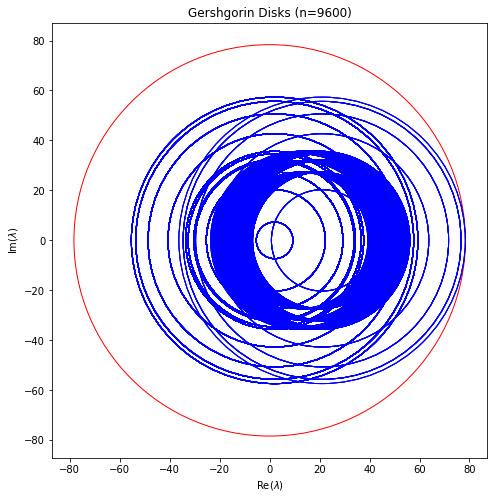

In [6]:
plot_gdisks(A1,fill=False)

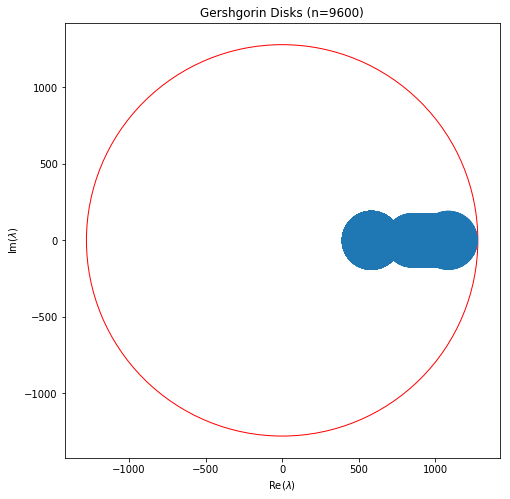

In [26]:
# Load matrix
A2,b2 = [io.loadmat('../mat/ddom_20x20x24_012.mat')[key] for key in ['A','b']]
plot_gdisks(A2)

k=0
k=100
k=200
k=300
k=400
k=500
k=600
k=700
k=800
k=900
k=1000
k=1100
k=1200
k=1300
k=1400
k=1500
k=1600
k=1700
k=1800
k=1900
k=2000
k=2100
k=2200
k=2300
k=2400
k=2500
k=2600
k=2700
k=2800
k=2900
k=3000
k=3100
k=3200
k=3300
k=3400
k=3500
k=3600
k=3700
k=3800
k=3900
k=4000
k=4100
k=4200
k=4300
k=4400
k=4500
k=4600
k=4700
k=4800
k=4900
k=5000
k=5100
k=5200
k=5300
k=5400
k=5500
k=5600
k=5700
k=5800
k=5900
k=6000
k=6100
k=6200
k=6300
k=6400
k=6500
k=6600
k=6700
k=6800
k=6900
k=7000
k=7100
k=7200
k=7300
k=7400
k=7500
k=7600
k=7700
k=7800
k=7900
k=8000
k=8100
k=8200
k=8300
k=8400
k=8500
k=8600
k=8700
k=8800
k=8900
k=9000
k=9100
k=9200
k=9300
k=9400
k=9500
Min (pre) : 1.000e+00


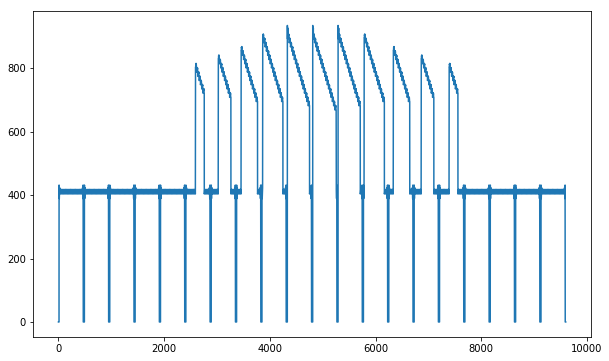

In [35]:
plot_dd(A2)

In [38]:
import scipy.linalg.lapack as lp

In [42]:
lp.dtrtrs?

In [70]:
a = np.diag(np.arange(1,11))
b = np.arange(1,11).reshape([10,1])

In [71]:
a2 = np.hstack([a,a])

In [72]:
b2 = np.hstack([b,b])

In [73]:
b2

array([[ 1,  1],
       [ 2,  2],
       [ 3,  3],
       [ 4,  4],
       [ 5,  5],
       [ 6,  6],
       [ 7,  7],
       [ 8,  8],
       [ 9,  9],
       [10, 10]])

In [58]:
a[0,1] = 1

In [61]:
s = sp.csc_matrix(a)

In [77]:
import scipy

In [84]:
sla.spsolve(s,b2)

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [81]:
la.solve(a,b2)

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [85]:
lp.dtrtrs(a,b2)

(array([[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]]), 0)